### Análise e Previsão de Rendimentos de Estudantes

Aluno: Luan Alysson de Souza
Trurma: TNT IA & LLM

Dados: https://docs.google.com/document/d/1Saiahem_nw2A6cFSZGeRiUOn-6xazFxVozYKJ4XliwE/edit?tab=t.0

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
#importando as bibliotecas necessarias
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSZx9XGgSyCDGszLNwgNESBjO2jKZUDaRsYJs6J3tA1KteWd2Ne_RcuPDRz5y7Wak4Syl3l18fLZ4R6/pub?output=csv')

In [ ]:
df.head(10)

,escola,sexo,idade,tipo_endereco,tamanho_familia,status_pais,educ_mae,educ_pai,trab_mae,trab_pai,...,tempo_livre,saidas,consumo_alcool_dia,consumo_alcool_fimsemana,estado_saude,num_faltas,nota_periodo1,nota_periodo2,nota_final,#N/D
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,NaN
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,NaN
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,NaN
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,NaN
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,NaN
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,NaN
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,NaN
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,NaN
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,NaN
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   escola                        395 non-null    object 
 1   sexo                          395 non-null    object 
 2   idade                         395 non-null    int64  
 3   tipo_endereco                 395 non-null    object 
 4   tamanho_familia               395 non-null    object 
 5   status_pais                   395 non-null    object 
 6   educ_mae                      395 non-null    int64  
 7   educ_pai                      395 non-null    int64  
 8   trab_mae                      395 non-null    object 
 9   trab_pai                      395 non-null    object 
 10  motivo_escolha                395 non-null    object 
 11  responsavel                   395 non-null    object 
 12  tempo_viagem                  395 non-null    int64  
 13  tempo

In [ ]:
df.isna().sum() #verifiquei a existência de valores nulos

,0
escola,0
sexo,0
idade,0
tipo_endereco,0
tamanho_familia,0
status_pais,0
educ_mae,0
educ_pai,0
trab_mae,0
trab_pai,0


In [ ]:
percent_missing = (df.isnull().sum() / df.shape[0]) * 100


# Deletando colunas com mais de 80% de dados ausentes
df = df.drop(columns=percent_missing[percent_missing > 80].index)

print('----------- Verificando se há Dados ausentes -----------')
print(df.isnull().sum())

----------- Verificando se há Dados ausentes -----------
escola                          0
sexo                            0
idade                           0
tipo_endereco                   0
tamanho_familia                 0
status_pais                     0
educ_mae                        0
educ_pai                        0
trab_mae                        0
trab_pai                        0
motivo_escolha                  0
responsavel                     0
tempo_viagem                    0
tempo_estudo                    0
num_reprovacoes                 0
apoio_escola                    0
apoio_familia                   0
aulas_particulares              0
atividades_extracurriculares    0
frequentou_creche               0
deseja_superior                 0
acesso_internet                 0
relacionamento_romantico        0
qualidade_rel_familiar          0
tempo_livre                     0
saidas                          0
consumo_alcool_dia              0
consumo_alcool_fimsemana 

In [ ]:
num_varibles = df.select_dtypes(include = ['float64', 'int']) #formatando variáveis

In [ ]:
df.columns

Index(['escola', 'sexo', 'idade', 'tipo_endereco', 'tamanho_familia',
       'status_pais', 'educ_mae', 'educ_pai', 'trab_mae', 'trab_pai',
       'motivo_escolha', 'responsavel', 'tempo_viagem', 'tempo_estudo',
       'num_reprovacoes', 'apoio_escola', 'apoio_familia',
       'aulas_particulares', 'atividades_extracurriculares',
       'frequentou_creche', 'deseja_superior', 'acesso_internet',
       'relacionamento_romantico', 'qualidade_rel_familiar', 'tempo_livre',
       'saidas', 'consumo_alcool_dia', 'consumo_alcool_fimsemana',
       'estado_saude', 'num_faltas', 'nota_periodo1', 'nota_periodo2',
       'nota_final'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns #selecionei os objetos da tabela

label_encoder = LabelEncoder() #transformei com o label encoder em inteiro
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.mean()

,0
escola,0.116456
sexo,0.473418
idade,16.696203
tipo_endereco,0.777215
tamanho_familia,0.288608
status_pais,0.896203
educ_mae,2.749367
educ_pai,2.521519
trab_mae,2.169620
trab_pai,2.281013


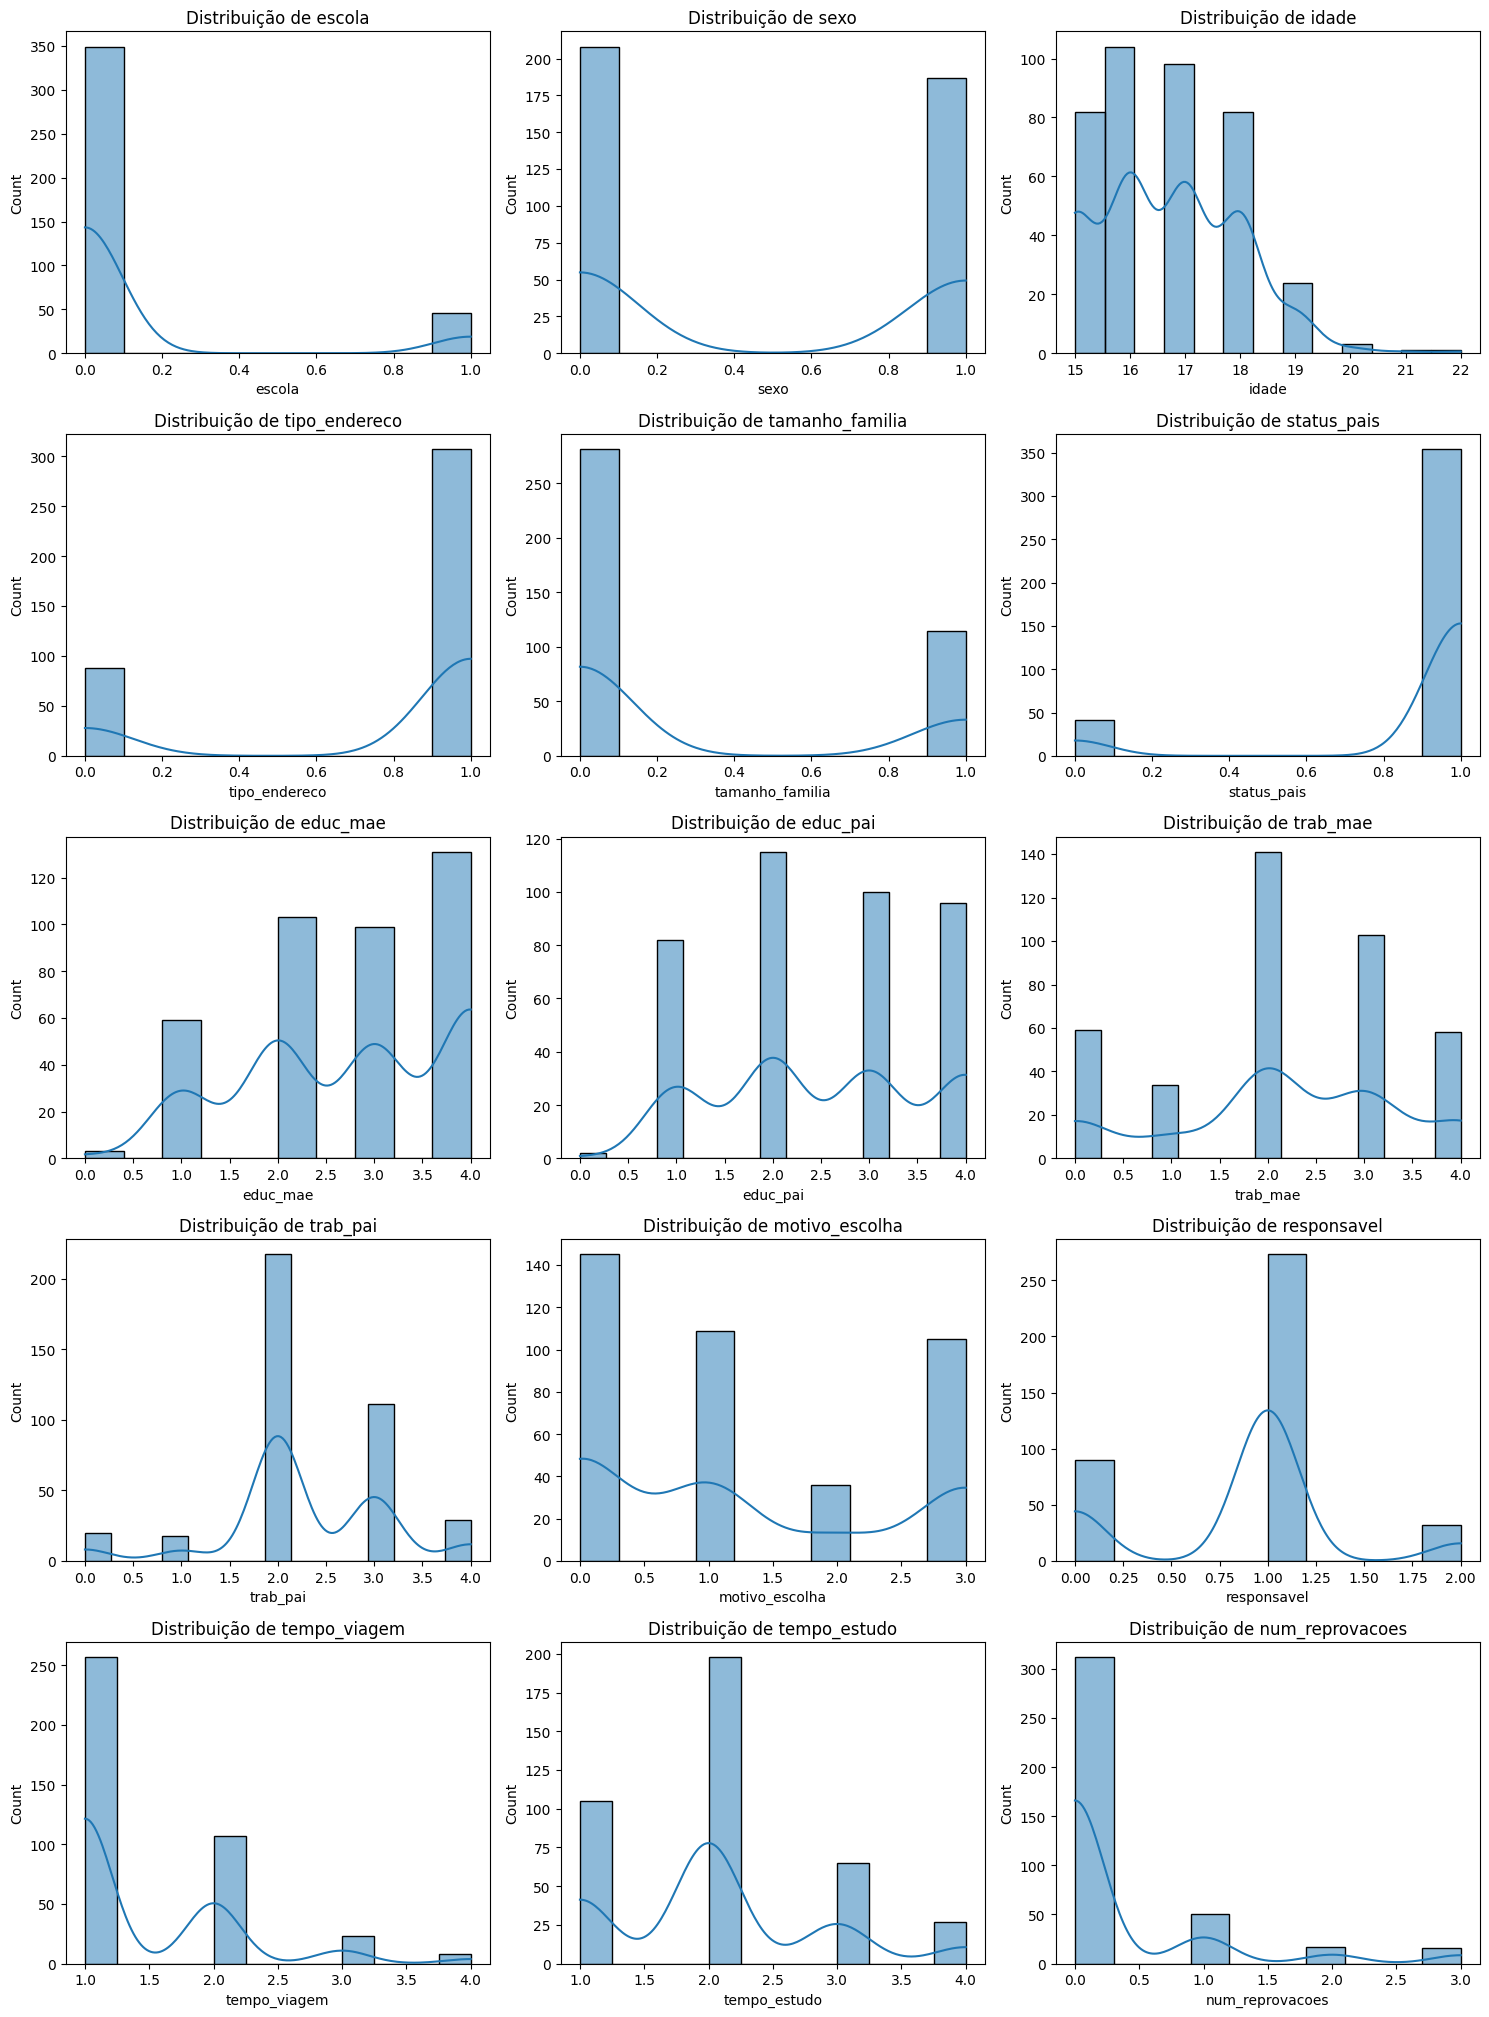

In [ ]:
import math
# Definir o número total de colunas
num_colunas = len(df.columns)

# Calcular número de linhas necessário (supondo 3 colunas por linha)
num_linhas = math.ceil(num_colunas / 3)

# Criar a figura
plt.figure(figsize=(15, num_linhas * 4))

# Criar os subplots
for i, col in enumerate(df.columns, 1):
    if i > 15:
        break  # Limitar a 15 gráficos

    plt.subplot(num_linhas, 3, i)  # Ajuste dinâmico
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Criando um objeto para PADRONIZAÇÃO dos dados
obj_padronizacao = StandardScaler().fit(df)
df_padronizado = obj_padronizacao.transform(df)
df_padronizado

array([[-0.3630498 , -0.94817639,  1.02304645, ..., -1.78246688,
        -1.25479105, -0.96493392],
       [-0.3630498 , -0.94817639,  0.23837976, ..., -1.78246688,
        -1.52097927, -0.96493392],
       [-0.3630498 , -0.94817639, -1.33095364, ..., -1.1791469 ,
        -0.72241461, -0.0907392 ],
       ...,
       [ 2.75444305,  1.05465609,  3.37704655, ..., -0.27416693,
        -0.72241461, -0.74638524],
       [ 2.75444305,  1.05465609,  1.02304645, ...,  0.02749306,
         0.34233827, -0.0907392 ],
       [ 2.75444305,  1.05465609,  1.80771315, ..., -0.87748691,
        -0.45622639, -0.30928788]])

In [ ]:
X = df.drop(columns=['nota_final'], axis =1 )
y = df['nota_final']

In [ ]:
print(X.shape)
print(y.shape)

(395, 32)
(395,)


In [ ]:
# 3. Separando treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#  Criar e treinar os modelos
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)

lin_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)

# Fazer previsões
y_pred_lin = lin_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)

print("\nR² no conjunto de teste LinearRegression:", round(r2_score(y_test, y_pred_lin), 2))
print("\nR² no conjunto de teste DecisionTreeRegressor:", round(r2_score(y_test, y_pred_tree), 2))


R² no conjunto de teste LinearRegression: 0.79

R² no conjunto de teste DecisionTreeRegressor: 0.86


In [ ]:
def avaliar_modelo_regressao(nome, y_true, y_pred):
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2%}")  # Convertendo em porcentagem


In [ ]:
avaliar_modelo_regressao("Regressão Linear", y_test, y_pred_lin)
avaliar_modelo_regressao("Árvore de Decisão Regressora", y_test, y_pred_tree)

MAE: 1.40
RMSE: 2.12
R² Score: 79.48%
MAE: 1.04
RMSE: 1.76
R² Score: 85.85%


In [ ]:
#  Criar a variável categórica Aprovado/Reprovado
df['Aprovado'] = (df['nota_final'] >= 10).astype(int)  # 1 se aprovado, 0 se reprovado

# Remover a coluna nota_fianl (não queremos prever a nota, mas sim a classificação)
X = df.drop(columns=['nota_final', 'Aprovado'])
y = df['Aprovado']

# Converter variáveis categóricas para numéricas
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])


In [ ]:
# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar os modelos
log_reg = LogisticRegression().fit(X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)

# Fazer previsões
y_pred_log = log_reg.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

print(set(y_test))  # Ver quais classes existem no conjunto de teste

{0, 1}


In [ ]:
def avaliar_modelo_classificacao(nome, y_true, y_pred):
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.2%}")
    print(f"Precisão: {precision_score(y_true, y_pred, average='macro', zero_division=1):.2%}")
    print(f"Recall: {recall_score(y_true, y_pred, average='macro', zero_division=1):.2%}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='macro', zero_division=1):.2%}")

In [ ]:
avaliar_modelo_classificacao("Regressão Logística", y_test, y_pred_log)
avaliar_modelo_classificacao("Árvore de Decisão Classificadora", y_test, y_pred_tree)

Acurácia: 93.67%
Precisão: 92.68%
Recall: 93.41%
F1-Score: 93.03%
Acurácia: 93.67%
Precisão: 92.68%
Recall: 93.41%
F1-Score: 93.03%


In [ ]:
portugues = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQmEm4SuBKE2_dXddpxAM38P7YbLWcRIAcb5lqql9nKlw4pbNd4sZS__a6oK1mI3MDfQu8PvHEUJVMC/pub?gid=998950341&single=true&output=csv')

In [ ]:
# --- 3. Tratamento de valores nulos ---
for col in portugues.columns:
    if portugues[col].dtype == 'object':
        portugues[col] = portugues[col].fillna('não informado')
    else:
        portugues[col] = portugues[col].fillna(portugues[col].median())

In [ ]:
# --- 4. Pré-processamento ---
def preprocessamento(df):
    df_proc = df.copy()
    le = LabelEncoder()
    for col in df_proc.columns:
        if df_proc[col].dtype == 'object':
            df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    df_proc = df_proc.fillna(0)
    return df_proc
portugues_proc = preprocessamento(portugues)

In [ ]:
### --- 6. Análise e Modelagem: Português ---
print("\n===== ANÁLISE - PORTUGUÊS =====")

# Regressão
X_port = portugues_proc.drop(['nota_final'], axis=1)
y_port = portugues_proc['nota_final']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_port, y_port, test_size=0.3, random_state=42)

lr_p = LinearRegression()
lr_p.fit(X_train_p, y_train_p)
y_pred_lr_p = lr_p.predict(X_test_p)

print("\nRegressão Linear - Português")
print("R²:", r2_score(y_test_p, y_pred_lr_p))
print("RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred_lr_p)))

dtr_p = DecisionTreeRegressor(random_state=42)
dtr_p.fit(X_train_p, y_train_p)
y_pred_dtr_p = dtr_p.predict(X_test_p)

print("\nÁrvore de Decisão Regressora - Português")
print("R²:", r2_score(y_test_p, y_pred_dtr_p))
print("RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred_dtr_p)))

# Classificação
portugues_proc['Aprovado'] = np.where(portugues_proc['nota_final'] >= 10, 1, 0)
X_class_p = portugues_proc.drop(['nota_final', 'Aprovado'], axis=1)
y_class_p = portugues_proc['Aprovado']
X_train_cp, X_test_cp, y_train_cp, y_test_cp = train_test_split(X_class_p, y_class_p, test_size=0.3, random_state=42)

logr_p = LogisticRegression(max_iter=1000)
logr_p.fit(X_train_cp, y_train_cp)
y_pred_logr_p = logr_p.predict(X_test_cp)

print("\nRegressão Logística - Português")
print("Acurácia:", accuracy_score(y_test_cp, y_pred_logr_p))
print("Precisão:", precision_score(y_test_cp, y_pred_logr_p))
print("Recall:", recall_score(y_test_cp, y_pred_logr_p))
print("Matriz de Confusão:\n", confusion_matrix(y_test_cp, y_pred_logr_p))

dtc_p = DecisionTreeClassifier(random_state=42)
dtc_p.fit(X_train_cp, y_train_cp)
y_pred_dtc_p = dtc_p.predict(X_test_cp)

print("\nÁrvore de Decisão Classificadora - Português")
print("Acurácia:", accuracy_score(y_test_cp, y_pred_dtc_p))
print("Precisão:", precision_score(y_test_cp, y_pred_dtc_p))
print("Recall:", recall_score(y_test_cp, y_pred_dtc_p))
print("Matriz de Confusão:\n", confusion_matrix(y_test_cp, y_pred_dtc_p))


===== ANÁLISE - PORTUGUÊS =====

Regressão Linear - Português
R²: 0.8699049941859338
RMSE: 1.1994205111292888

Árvore de Decisão Regressora - Português
R²: 0.6443044477105064
RMSE: 1.983263304085802

Regressão Logística - Português
Acurácia: 0.9230769230769231
Precisão: 0.9529411764705882
Recall: 0.9585798816568047
Matriz de Confusão:
 [[ 18   8]
 [  7 162]]

Árvore de Decisão Classificadora - Português
Acurácia: 0.9282051282051282
Precisão: 0.9585798816568047
Recall: 0.9585798816568047
Matriz de Confusão:
 [[ 19   7]
 [  7 162]]


In [ ]:
matematica = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQmEm4SuBKE2_dXddpxAM38P7YbLWcRIAcb5lqql9nKlw4pbNd4sZS__a6oK1mI3MDfQu8PvHEUJVMC/pub?gid=1209425280&single=true&output=csv')

In [ ]:
# --- 3. Tratamento de valores nulos ---
for col in matematica.columns:
    if matematica[col].dtype == 'object':
        matematica[col] = matematica[col].fillna('não informado')
    else:
        matematica[col] = matematica[col].fillna(matematica[col].median())

In [ ]:
# --- 4. Pré-processamento ---
def preprocessamento(df):
    df_proc = df.copy()
    le = LabelEncoder()
    for col in df_proc.columns:
        if df_proc[col].dtype == 'object':
            df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    df_proc = df_proc.fillna(0)
    return df_proc
matematica_proc = preprocessamento(matematica)

In [ ]:
### --- 5. Análise e Modelagem: Matemática ---
print("\n===== ANÁLISE - MATEMÁTICA =====")

# Regressão
X_math = matematica_proc.drop(['nota_final'], axis=1)
y_math = matematica_proc['nota_final']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_math, y_math, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train_m, y_train_m)
y_pred_lr = lr.predict(X_test_m)

print("\nRegressão Linear - Matemática")
print("R²:", r2_score(y_test_m, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_lr)))

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_m, y_train_m)
y_pred_dtr = dtr.predict(X_test_m)

print("\nÁrvore de Decisão Regressora - Matemática")
print("R²:", r2_score(y_test_m, y_pred_dtr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_dtr)))

# Classificação
matematica_proc['Aprovado'] = np.where(matematica_proc['nota_final'] >= 10, 1, 0)
X_class = matematica_proc.drop(['nota_final', 'Aprovado'], axis=1)
y_class = matematica_proc['Aprovado']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

logr = LogisticRegression(max_iter=1000)
logr.fit(X_train_c, y_train_c)
y_pred_logr = logr.predict(X_test_c)

print("\nRegressão Logística - Matemática")
print("Acurácia:", accuracy_score(y_test_c, y_pred_logr))
print("Precisão:", precision_score(y_test_c, y_pred_logr))
print("Recall:", recall_score(y_test_c, y_pred_logr))
print("Matriz de Confusão:\n", confusion_matrix(y_test_c, y_pred_logr))

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_c, y_train_c)
y_pred_dtc = dtc.predict(X_test_c)

print("\nÁrvore de Decisão Classificadora - Matemática")
print("Acurácia:", accuracy_score(y_test_c, y_pred_dtc))
print("Precisão:", precision_score(y_test_c, y_pred_dtc))
print("Recall:", recall_score(y_test_c, y_pred_dtc))
print("Matriz de Confusão:\n", confusion_matrix(y_test_c, y_pred_dtc))


===== ANÁLISE - MATEMÁTICA =====

Regressão Linear - Matemática
R²: 0.7947708519011206
RMSE: 2.1239962683180083

Árvore de Decisão Regressora - Matemática
R²: 0.774453239443859
RMSE: 2.2266529126195915

Regressão Logística - Matemática
Acurácia: 0.9243697478991597
Precisão: 0.9444444444444444
Recall: 0.9315068493150684
Matriz de Confusão:
 [[42  4]
 [ 5 68]]

Árvore de Decisão Classificadora - Matemática
Acurácia: 0.8571428571428571
Precisão: 0.8888888888888888
Recall: 0.8767123287671232
Matriz de Confusão:
 [[38  8]
 [ 9 64]]
